# <center> Mini Projeto - Walmart </center>

---

## O que será feito?
Em um cenário onde a empresa Walmart precisa fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para **expandir seu tamanho** será montado um Notebook bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema. Também será ressaltado/explicado passagens complexas ou insights que você tiver durante a resolução desse projeto.

## Descrição do Projeto
O Projeto de deverá ser desenvolvido em 3 etapas do CRISP-DM, que são o Business Understanding, Data Understanding e Data Preparation

**Business Understanding:** Nessa etapa o principal objetivo será compreender os requisitos do projeto. Para isso precisamos responder 3 tasks principais:
- Determinar os objetivos de negócio
- Fazer a avaliação da situação
- Determinar os objetivos e metas para a mineração de dados

**Data Understanding:** Nessa etapa o principal objetivo será compreender os dados que o projeto possui. Para isso precisamos responder 3 tasks principais:
- Coleta Inicial dos dados
- Descrição dos dados
- Exploração dos dados

**Data Preparation:** Nessa etapa são realizadas todas as limpezas e preparações necessárias nos dados, além de ser nela que começarão a ser respondidas as perguntas propostas. Para isso precisamos responder 3 tasks principais:
- Seleção dos dados
- Limpeza dos dados
- Responder às questões de output de projeto

## Output do Projeto

Ao final da análise, serão respondidas as 5 seguintes questões:

1. Qual o preço médio de vendas semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do 
ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do 
tempo. Ressalte de alguma forma, o período de feriados mencionados acima
5. Pensando na expansão de uma das lojas, que loja você escolheria e o porque

---

# 1.**Business Understanding**

## Walmart Inc.
Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões. Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

### Determinando os objetivos de negócio
A empresa precisa fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para 
**expandir seu tamanho,** dado que as vendas de uma determinada loja são afetadas por algumas variáveis em cada loja como temperatura, preço do combustível na região, CPI, desemprego.

### Avaliação da Situação
Dataset: https://www.kaggle.com/yasserh/walmart-dataset

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Walmart e também algumas métricas econômicas e meteorológicas por semana. A descrição destas características estão abaixo:

- Lista dos 4 maiores feriados americanos

   | Holiday Events | Semanas |
   | --- | --- |
   | Super Bowl | 12-Feb-10, 11-Feb-11, 10-Feb-12 |
   | Labour Day | 10-Sep-10, 09-Sep-11, 07-Sep-12 |
   | Thanksgiving | 26-Nov-10, 25-Nov-11, 23-Nov-12 |
   | Christmas | 31-Dec-10, 30-Dec-11, 28-Dec-12 |
<br></br>
- Descrição de cada coluna das tabelas da base

   | Variável | Descrição |
   | --- | --- |
   | Store | Número de Lojas |
   | Date | Semana de Venda |
   | Weekly_Sales | Venda naquela semana |
   | Holiday_Flag | Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week) |
   | Temperature | Temperatura do dia em ºF |
   | Fuel_Price | Preço do combustível na região da Loja |
   | CPI | Índice de preços ao consumidor |
   | Unemployment | Taxa de desemprego |
<br></br>
Para que sejam feitos todos os tratamentos e limpezas necessárias será utilizada a linguagem Python e os recursos disponíveis nas bibliotecas Pandas e Seaborn, podendo ser feito uso de outras bibliotecas de dados conforme a necessidade. Além disso, para fins mais ilustrativos poderá ser usado o software Power BI para a confecção de um painel ilustrativo com todos os insights criados.

### Objetivos e Metas para a Mineração de Dados


# 2.**Data Understanding**

### Coleta Inicial dos dados

A coleta da base de dados será feita a partir do arquivo do tipo CSV disponibilizado, utilizando a biblioteca Pandas do Python. Os dados tem origem nessa única fonte, facilitando a coleta e análise dos mesmos. Abaixo segue um o código utilizado para carregar a base de dados através da função read_csv, assim como um print da base para visualização e confirmação do seu formato inicial.

In [ ]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format # valores da base de dados sendo mostrados apenas com 2 casas decimais.

df = pd.read_csv('Walmart.csv')

print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31        2.57   
1         1  12-02-2010    1641957.44             1        38.51        2.55   
2         1  19-02-2010    1611968.17             0        39.93        2.51   
3         1  26-02-2010    1409727.59             0        46.63        2.56   
4         1  05-03-2010    1554806.68             0        46.50        2.62   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88        4.00   
6431     45  05-10-2012     733455.07             0        64.89        3.98   
6432     45  12-10-2012     734464.36             0        54.47        4.00   
6433     45  19-10-2012     718125.53             0        56.47        3.97   
6434     45  26-10-2012     760281.43             0        58.85        3.88   

        CPI  Unemployment  
0    211.10

### Descrição dos dados

Antes de iniciar as transformações e análises necessárias na base precisamos entender mais sobre as principais características da base de dados, como por exemplo: nº de linhas, nº de colunas, tipos de dados de cada coluna, se existe algum valor nulo dentro da base e etc. Essas informações podem ser obtidas de maneira rápida utilizando a função info() da biblioteca Pandas, como mostrado abaixo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Além disso, é importante sabermos também se há valores duplicados na base de dados, sendo assim, usaremos a função duplicated() para obtermos uma Serie contendo valores de True caso o dado seja duplicado e False para o contrário. Tendo essa Serie em mãos, podemos utilizar a função sum() para obtermos a quantidade de valores True, ou seja duplicados, que temos na base de dados.

In [ ]:
df.duplicated().sum()

0

### Exploração dos dados

Para dar início a exploração dos dados da base, a função describe() também foi utilizada para obtermos informações estatísticas básicas (soma, média, desvio padrão, mínimo, quartis e máximo) das colunas do DataFrame, no caso da base utilizada filtramos ainda para que a função faça os calculos apenas das colunas quantitativas (Weekly_Sales, Temperature, Fuel_Price, CPI e Unemployment), visto que há colunas na base que são de caráter qualitativo (Store, Date e Holiday_Flag) e que não fazem sentido terem essas informações calculadas.

In [ ]:
df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,60.66,3.36,171.58,8.00
std,564366.62,18.44,0.46,39.36,1.88
min,209986.25,-2.06,2.47,126.06,3.88
25%,553350.10,47.46,2.93,131.74,6.89
50%,960746.04,62.67,3.44,182.62,7.87
75%,1420158.66,74.94,3.73,212.74,8.62
max,3818686.45,100.14,4.47,227.23,14.31


# 3. **Data Preparation e Outputs do Projeto**

Como dito anteriormente, nessa etapa serão realizadas 3 tasks principais relacionadas a todo o tratamento e uso dos dados (seleção, limpeza e respostas das questões propostas). Para isso, com base em todas as informações e entendimentos obtidos nas etapas anteriores do CRISP-DM, podemos partir para a resolução de cada pergunta separadamente, selecionando e limpando a base de dados de acordo com as necessidades apresentadas por cada questão.

### 1. Qual o preço médio de vendas semanal por loja?

Para responder essa pergunta, primeiro precisaremos agrupar as vendas de cada loja (Store) calculando sua média de vendas semanal de cada uma. No código abaixo é apresentado esse agrupamento com a utilização da função groupby() sendo a coluna Store a nossa categoria e mean() a nossa função de agregação. O resultado disso é apresentado na Serie abaixo:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') #Converte coluna Date para o tipo Datetime
df = df.sort_values(by='Date') #Ordena os dados utilizando a coluna Date

avg_sales = df.groupby('Store')['Weekly_Sales'].mean()
print(avg_sales)

Store
1    1555264.40
2    1925751.34
3     402704.44
4    2094712.96
5     318011.81
6    1564728.19
7     570617.31
8     908749.52
9     543980.55
10   1899424.57
11   1356383.12
12   1009001.61
13   2003620.31
14   2020978.40
15    623312.47
16    519247.73
17    893581.39
18   1084718.42
19   1444999.04
20   2107676.87
21    756069.08
22   1028501.04
23   1389864.46
24   1356755.39
25    706721.53
26   1002911.84
27   1775216.20
28   1323522.24
29    539451.43
30    438579.62
31   1395901.44
32   1166568.15
33    259861.69
34    966781.56
35    919724.98
36    373511.99
37    518900.28
38    385731.65
39   1450668.13
40    964128.04
41   1268125.42
42    556403.86
43    633324.72
44    302748.87
45    785981.41
Name: Weekly_Sales, dtype: float64


Utilizando esse resultado podemos utilizar as bibliotecas Matplotlib e Seaborn para visualizar os resultados de cada loja na forma de um gráfico de barras verticais com os respectivos intervalos de confiança. 

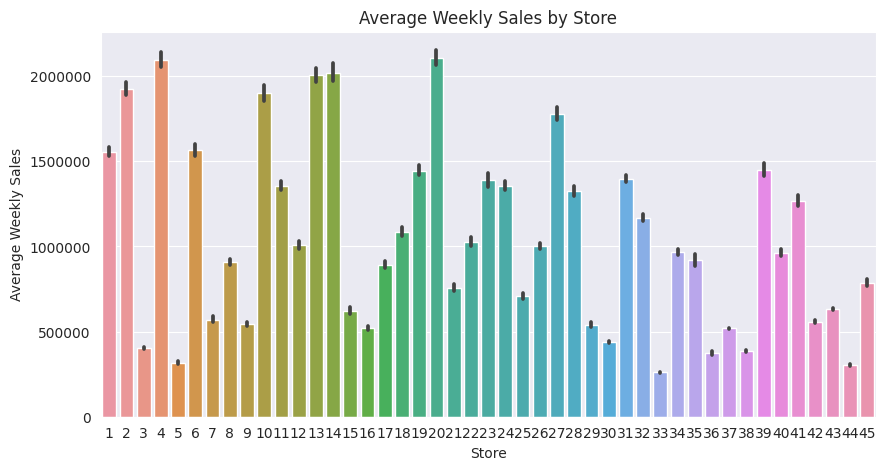

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Store', y='Weekly_Sales')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 2. Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas?

Para responder a segunda pergunta será necessária a criação de uma Matriz de Correlações, na qual será possível visualizar como cada variável se relaciona. Essa matriz será criada com o uso da função corr() e auxílio das bibliotecas MatplotLib e Seaborn para uma melhor visualização.

<ipython-input-56-88ea81b4a042>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-56-88ea81b4a042>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Blues')


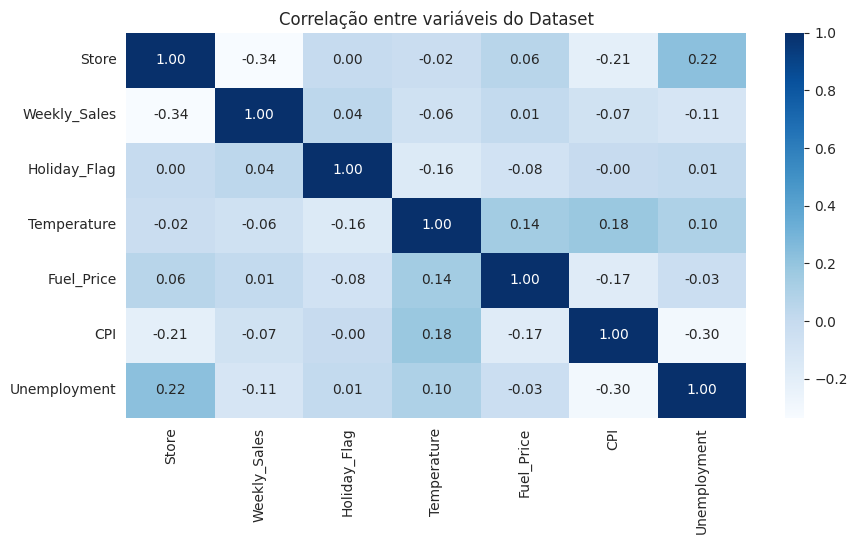

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do Dataset')
plt.show()

Avaliando a matriz, com uma maior atenção na linha/coluna "Weekly_Sales" na qual mostra as correlações com as vendas, verifica-se que os atributos com maior correlação com as vendas são o atributo "Store" e o atributo "Unemployment" com -0.34 e -0.11 respectivamente. Porém, como sabemos o atributo "Store" possui valores qualitativos, portanto, para essa análise não deve ser considerado. Dito isso, temos que **a maior correlação com as vendas é visto no atributo "Unemployment"**, o que indica que quanto maior o desemprego, menor serão as vendas.

### 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

Inicialmente para respondermos essa pergunta precisamos descobrir qual loja teve o maior valor de venda acumulada durante todo o período. O código abaixo calcula a soma acumulada das vendas para cada loja e ordena as mesmas da que mais vendeu para a que menos vendeu. Por fim, é apresentado o resultado dessas operações em um gráfico onde podemos observar que a loja que mais vendeu foi a loja 20.

    Store  Weekly_Sales
0      20  301397792.46
1       4  299543953.38
2      14  288999911.34
3      13  286517703.80
4       2  275382440.98
5      10  271617713.89
6      27  253855916.88
7       6  223756130.64
8       1  222402808.85
9      39  207445542.47
10     19  206634862.10
11     31  199613905.50
12     23  198750617.85
13     24  194016021.28
14     11  193962786.80
15     28  189263680.58
16     41  181341934.89
17     32  166819246.16
18     18  155114734.21
19     22  147075648.57
20     12  144287230.15
21     26  143416393.79
22     34  138249763.00
23     40  137870309.79
24     35  131520672.08
25      8  129951181.13
26     17  127782138.83
27     45  112395341.42
28     21  108117878.92
29     25  101061179.17
30     43   90565435.41
31     15   89133683.92
32      7   81598275.14
33     42   79565752.43
34      9   77789218.99
35     29   77141554.31
36     16   74252425.40
37     37   74202740.32
38     30   62716885.12
39      3   57586735.07
40     38   5515

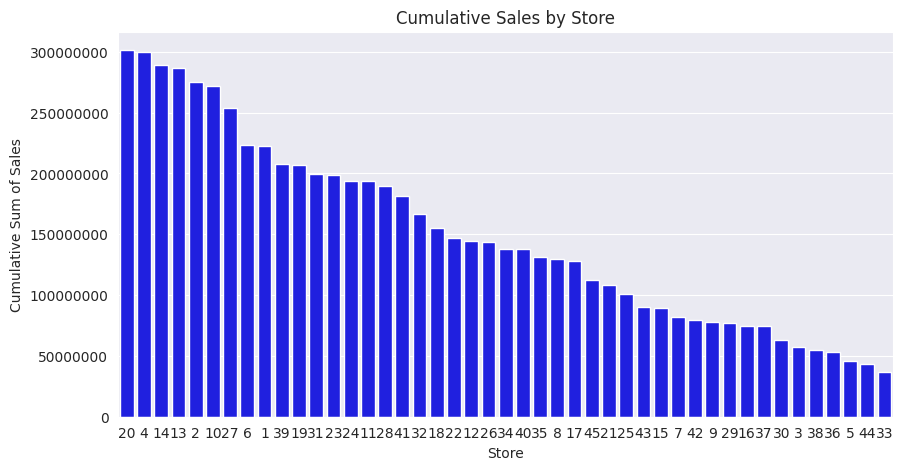

In [ ]:
df_highest_selling_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()

print(df_highest_selling_stores)

df_highest_selling_stores['Store'] = df_highest_selling_stores['Store'].astype(str) #Transforma a coluna Store para o tipo string de forma a ajudar na ordenação do gráfico.

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(data=df_highest_selling_stores, x='Store', y='Weekly_Sales', color='blue')
plt.title('Cumulative Sales by Store')
plt.xlabel('Store')
plt.ylabel('Cumulative Sum of Sales')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

Sabendo agora qual loja teve o maior número de vendas, podemos analisar as vendas dessa loja semana a semana, e a partir dessa análise verificar quais dessas semanas ultrapassaram a média da loja no período completo. O código abaixo faz esse calculo e apresenta o resultado em um gráfico de linhas, que indica qual foi a média (linha vermelha) e quais semanas ficaram acima.

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2717     20 2010-02-05    2401395.47             0        25.92        2.78   
2718     20 2010-02-12    2109107.90             1        22.12        2.77   
2719     20 2010-02-19    2161549.76             0        25.43        2.75   
2721     20 2010-03-05    2119213.72             0        31.75        2.78   
2725     20 2010-04-02    2405395.22             0        51.00        2.85   
2730     20 2010-05-07    2137202.38             0        66.74        2.97   
2734     20 2010-06-04    2203619.35             0        72.52        2.85   
2738     20 2010-07-02    2143676.77             0        70.10        2.81   
2747     20 2010-09-03    2121561.41             0        75.50        2.71   
2756     20 2010-11-05    2184316.64             0        42.78        2.92   
2757     20 2010-11-12    2187765.28             0        42.38        2.93   
2759     20 2010-11-26    2811634.04             1  

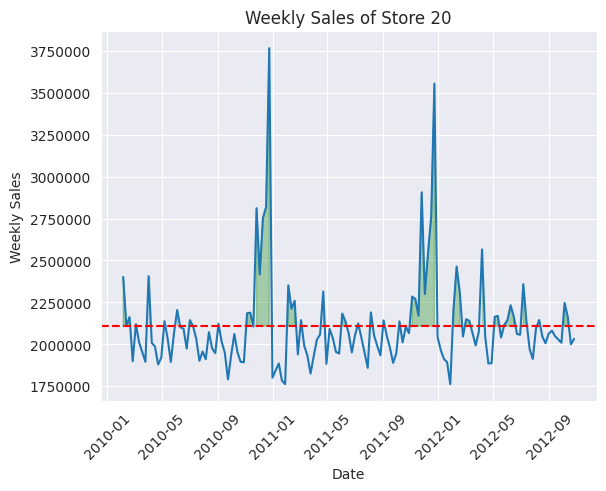

In [ ]:
highest_selling_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
store_sales = df.loc[df['Store'] == highest_selling_store]
weeks_above_avg = store_sales.loc[store_sales['Weekly_Sales'] > avg_sales[highest_selling_store]]

print(weeks_above_avg)

plt.plot(store_sales['Date'], store_sales['Weekly_Sales'])
plt.axhline(y=avg_sales[highest_selling_store], color='r', linestyle='--')
plt.fill_between(store_sales['Date'], avg_sales[highest_selling_store], store_sales['Weekly_Sales'], 
                 where=store_sales['Weekly_Sales'] > avg_sales[highest_selling_store], alpha=0.3, color='g')
plt.title(f'Weekly Sales of Store {highest_selling_store}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### 4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima

Para obtermos um gráfico desse tipo, a primeira coisa que devemos saber é quais são os valores de máximo, médio e mínimo das vendas em cada semana, ou seja, para cada semana do ano, verificaremos qual foi a loja com maior venda, a média de todas as lojas e a loja com a menor venda. Para isso usaremos novamente a função de agrupamento groupby() agrupando as vendas utilizando a coluna "Date" e as 3 funções de agregação citadas. max(), min() e mean().

In [ ]:
# calculate max, min, and avg sales for all weeks
max_sales = df.groupby('Date')['Weekly_Sales'].max()
min_sales = df.groupby('Date')['Weekly_Sales'].min()
avg_sales1 = df.groupby('Date')['Weekly_Sales'].mean()

print(max_sales)
print('-'*50)
print(min_sales)
print('-'*50)
print(avg_sales1)
print('-'*50)

Date
2010-02-05   2623469.95
2010-02-12   2188307.39
2010-02-19   2204556.70
2010-02-26   2095591.63
2010-03-05   2237544.75
                ...    
2012-09-28   2027620.23
2012-10-05   2246411.89
2012-10-12   2162951.36
2012-10-19   2097266.85
2012-10-26   2149594.46
Name: Weekly_Sales, Length: 143, dtype: float64
--------------------------------------------------
Date
2010-02-05   274593.43
2010-02-12   286857.13
2010-02-19   267956.30
2010-02-26   270281.63
2010-03-05   284617.27
                ...   
2012-09-28   242813.51
2012-10-05   265444.90
2012-10-12   291781.15
2012-10-19   254412.34
2012-10-26   253731.13
Name: Weekly_Sales, Length: 143, dtype: float64
--------------------------------------------------
Date
2010-02-05   1105572.01
2010-02-12   1074148.39
2010-02-19   1072822.08
2010-02-26    977079.36
2010-03-05   1041588.23
                ...    
2012-09-28    971886.65
2012-10-05   1057036.43
2012-10-12   1025078.09
2012-10-19   1002720.23
2012-10-26   1012091.47
Name: 

Utilizando essas 3 Series podemos plotar um gráfico de linhas onde cada uma das linhas demonstrará a variação desses valores no decorrer de cada semana. Além disso, é necessário que um outro DataFrame seja gerado, contendo as datas nas quais um feriado acontece. Para isso, utilizamos a função de agrupamento novamente, dessa vez agrupando por data as informações da coluna Holiday_Flag, que indica com o valor 1 se aquela semana é um feriado ou não. Utilizando esse DataFrame podemos indicar através de linhas verticais quais semanas do nosso gráfico serão semanas de feriado. O código abaixo apresenta esse procedimento além de imprimir o DataFrame de feriados gerado.

2010-02-12 00:00:00
2010-09-10 00:00:00
2010-11-26 00:00:00
2010-12-31 00:00:00
2011-02-11 00:00:00
2011-09-09 00:00:00
2011-11-25 00:00:00
2011-12-30 00:00:00
2012-02-10 00:00:00
2012-09-07 00:00:00


<ipython-input-60-bc10cb0de7ac>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date,holidayFlag in is_holiday.iteritems():


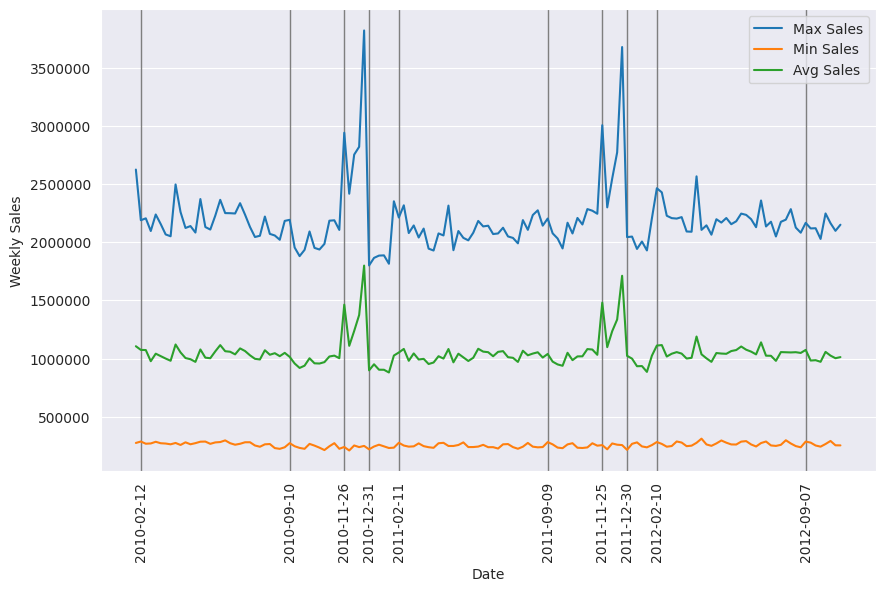

In [ ]:
# create a Boolean series to indicate whether each week had a holiday or not
is_holiday = df.groupby('Date')['Holiday_Flag'].max() == 1

# print the weeks that had holidays
for date,holidayFlag in is_holiday.iteritems():
    if holidayFlag:
        print(date)

# create a list of holiday dates
holiday_dates = is_holiday.index[is_holiday]

# create the line graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(max_sales.index, max_sales, label='Max Sales')
ax.plot(min_sales.index, min_sales, label='Min Sales')
ax.plot(avg_sales1.index, avg_sales1, label='Avg Sales')

# shade the weeks that had holidays
for date in holiday_dates:
    ax.axvspan(date, date, color='black', alpha=0.5)

# set the x-axis label to 'Date' and the y-axis label to 'Weekly Sales'
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')

# set the x-ticks to only the holiday dates and rotate them vertically
ax.set_xticks(holiday_dates)

# format the x-axis labels to show only year, month, and day
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in holiday_dates], rotation=90)

# add a legend to the graph
ax.legend()

plt.ticklabel_format(style='plain', axis='y')

# display the graph
plt.show()

### 5. Pensando na expansão de uma das lojas, que loja você escolheria e o porque

Primeiro criamos gráficos de dispersão para visualizarmos melhor a relação das diversas variáveis com as vendas semanais.

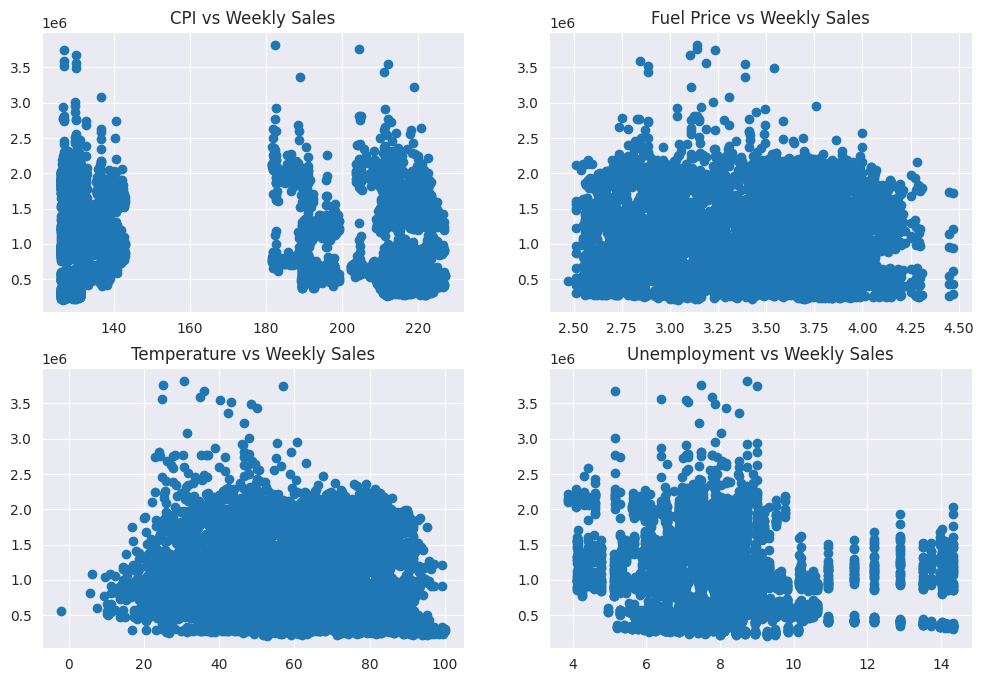

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(df['CPI'], df['Weekly_Sales'])
axs[0, 0].set_title('CPI vs Weekly Sales')

axs[0, 1].scatter(df['Fuel_Price'], df['Weekly_Sales'])
axs[0, 1].set_title('Fuel Price vs Weekly Sales')

axs[1, 0].scatter(df['Temperature'], df['Weekly_Sales'])
axs[1, 0].set_title('Temperature vs Weekly Sales')

axs[1, 1].scatter(df['Unemployment'], df['Weekly_Sales'])
axs[1, 1].set_title('Unemployment vs Weekly Sales')

plt.show()

Observando o gráfico de dispersão da variável CPI vs a variável Weekly_Sales, é possível perceber um vão entre os pontos que nos impede de concluir que a variação entre as duas é necessariamente linear. Seguindo a isso, entendemos a necessidade de visualizar o desempenho das duas variáveis através do tempo. Necessidade atendidade pelo gráfico de linha abaixo:

<function matplotlib.pyplot.show(close=None, block=None)>

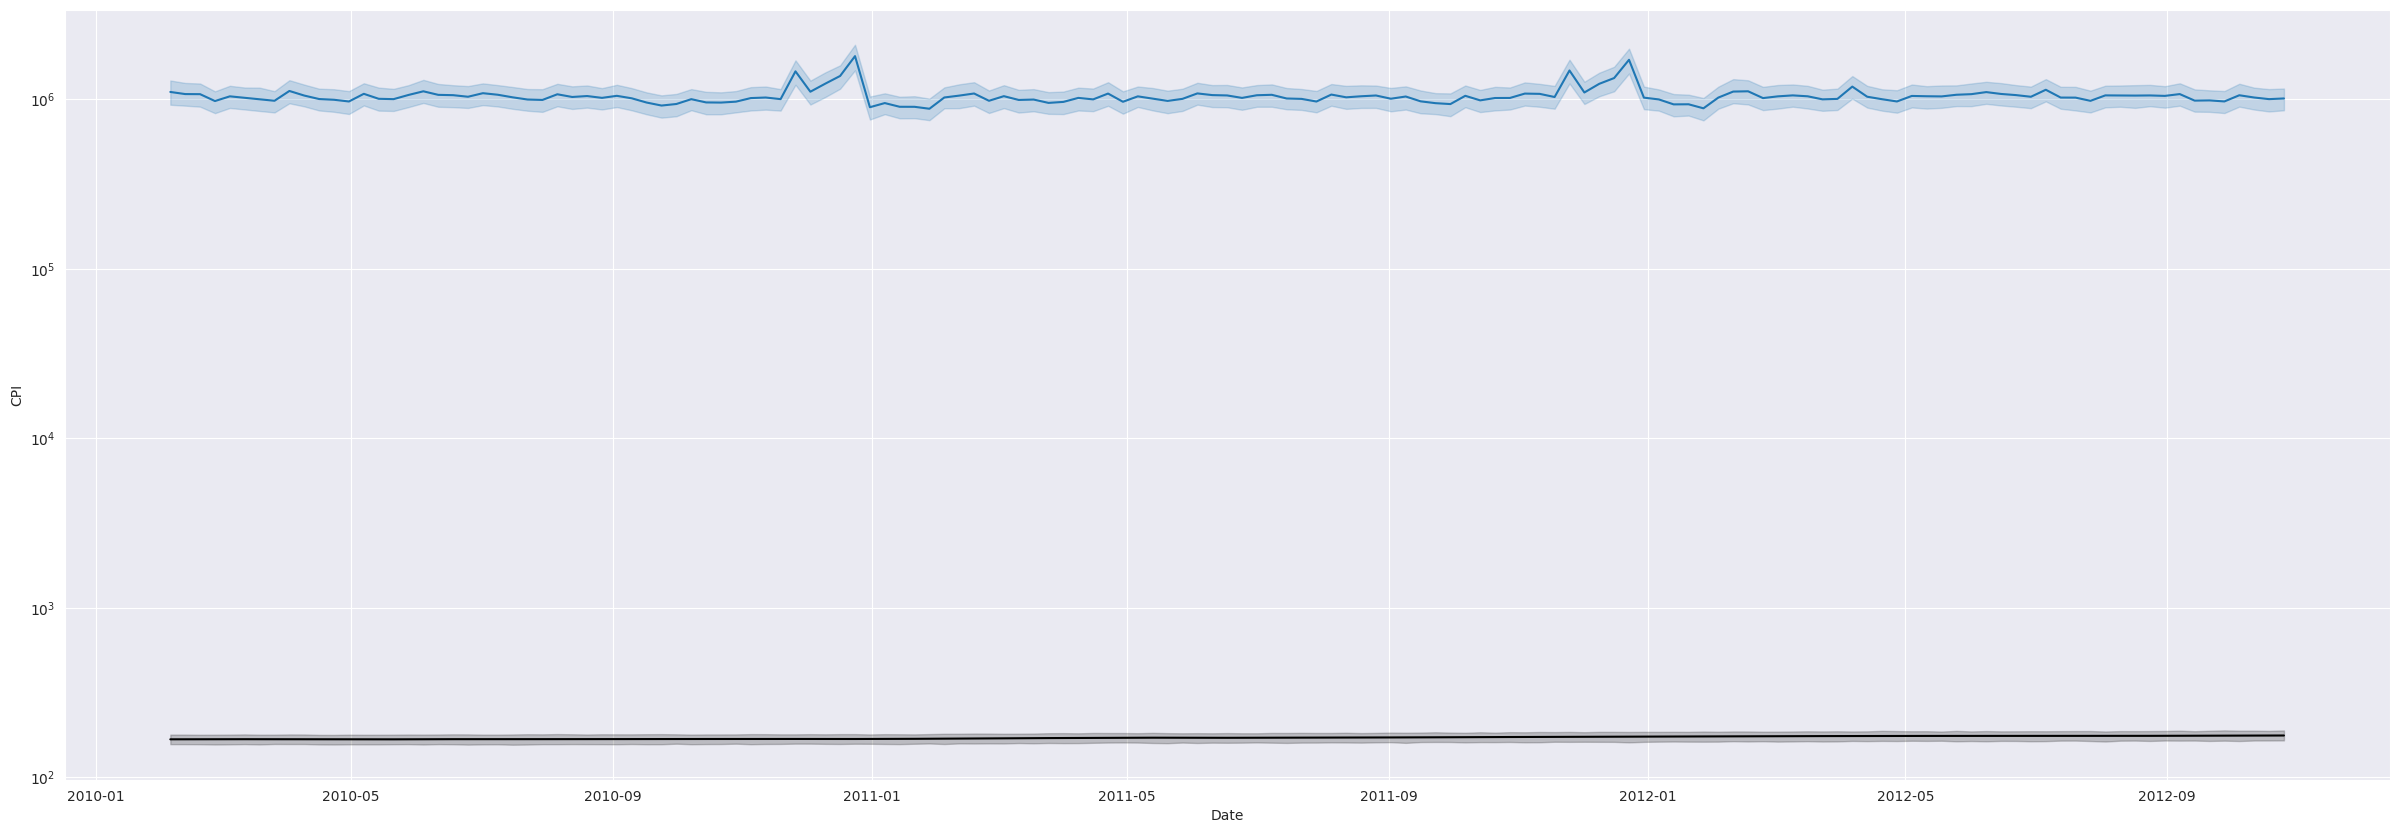

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(data=df, x='Date', y=df['CPI'], color='black')
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.yscale('log')
plt.show

Julgando pelo gráfico de linha acima é possível perceber que na escala em que Weekly_Sales se encontra, a evolução da variável CPI é indistinguível. Ficamos curiosos com isso, portanto, para termos segurança, decidimos medir a amplitude da variável CPI

In [ ]:
amplitude = df['CPI'].max() - df['CPI'].min()
amplitude

101.1688068

O cálculo acima denota uma amplitude muito pequena da variável. Desta forma se faz necessário normalizar a coluna CPI para uma escala mais aceitável.

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# normalize the column 'CPI'
df['CPI_norm'] = scaler.fit_transform(df[['CPI']])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,CPI_norm
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,1.00
1287,10,2010-02-05,2193048.75,0,54.34,2.96,126.44,9.77,-1.15
5148,37,2010-02-05,536006.73,0,45.97,2.57,209.85,8.55,0.97
2288,17,2010-02-05,789036.02,0,23.11,2.67,126.44,6.55,-1.15
4147,30,2010-02-05,465108.52,0,39.05,2.57,210.75,8.32,1.00
...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.88,216.15,7.29,1.13
714,5,2012-10-26,319550.77,0,71.70,3.51,224.04,5.42,1.33
5719,40,2012-10-26,921264.52,0,49.65,3.92,138.73,4.14,-0.83
2573,18,2012-10-26,1127516.25,0,56.09,3.92,138.73,8.24,-0.83


Acima usamos a função StandardScaler para criar uma nova coluna com os dados de CPI normalizados em uma escala mais comparável com as vendas semanais. Agora podemos aplicar uma operação de regressão linear para descobrirmos o quanto as variáveis Fuel_price, CPI_norm e Unemployment têm sobre Weekly_Sales

In [ ]:
import statsmodels.api as sm

coefs = {}
for x in df['Store']:
  intercept = df[df['Store'] == x]
  model_i = sm.OLS(intercept['Weekly_Sales'], intercept[['Fuel_Price', 'CPI_norm','Unemployment']])
  model_i =  model_i.fit()

  if model_i.f_pvalue > 0.05:
    print("F-stat não confirma o p-valor:", model_i.f_pvalue, x)
  if model_i.f_pvalue < 0.05:
    coefs[x] = model_i.params
coefs

{1: Fuel_Price     -62023.71
 CPI_norm       807038.25
 Unemployment   110915.49
 dtype: float64,
 10: Fuel_Price         5612.38
 CPI_norm       -2159238.94
 Unemployment     -56821.94
 dtype: float64,
 37: Fuel_Price     -13229.47
 CPI_norm       285251.07
 Unemployment    31599.57
 dtype: float64,
 17: Fuel_Price      145723.25
 CPI_norm       -594620.22
 Unemployment    -35715.97
 dtype: float64,
 30: Fuel_Price     -37834.24
 CPI_norm       252599.48
 Unemployment    36391.84
 dtype: float64,
 25: Fuel_Price     -31760.18
 CPI_norm       287239.06
 Unemployment    73446.10
 dtype: float64,
 22: Fuel_Price      44083.16
 CPI_norm        60023.51
 Unemployment   114704.33
 dtype: float64,
 23: Fuel_Price        64713.19
 CPI_norm       -2492475.54
 Unemployment    -238736.06
 dtype: float64,
 24: Fuel_Price      -37828.29
 CPI_norm       -412716.08
 Unemployment    131312.39
 dtype: float64,
 19: Fuel_Price        4052.56
 CPI_norm       -512633.37
 Unemployment    119439.15
 dtype:

No modelo acima aplicamos regressão linear em cada loja e imprimimos um dicionário com todos os resultados por loja. Não incluímos as variáveis Temperatura e Holiday_Flag por causa características sazonais, como exemplificado pela variável Temperature abaixo:

<Axes: xlabel='Date', ylabel='Temperature'>

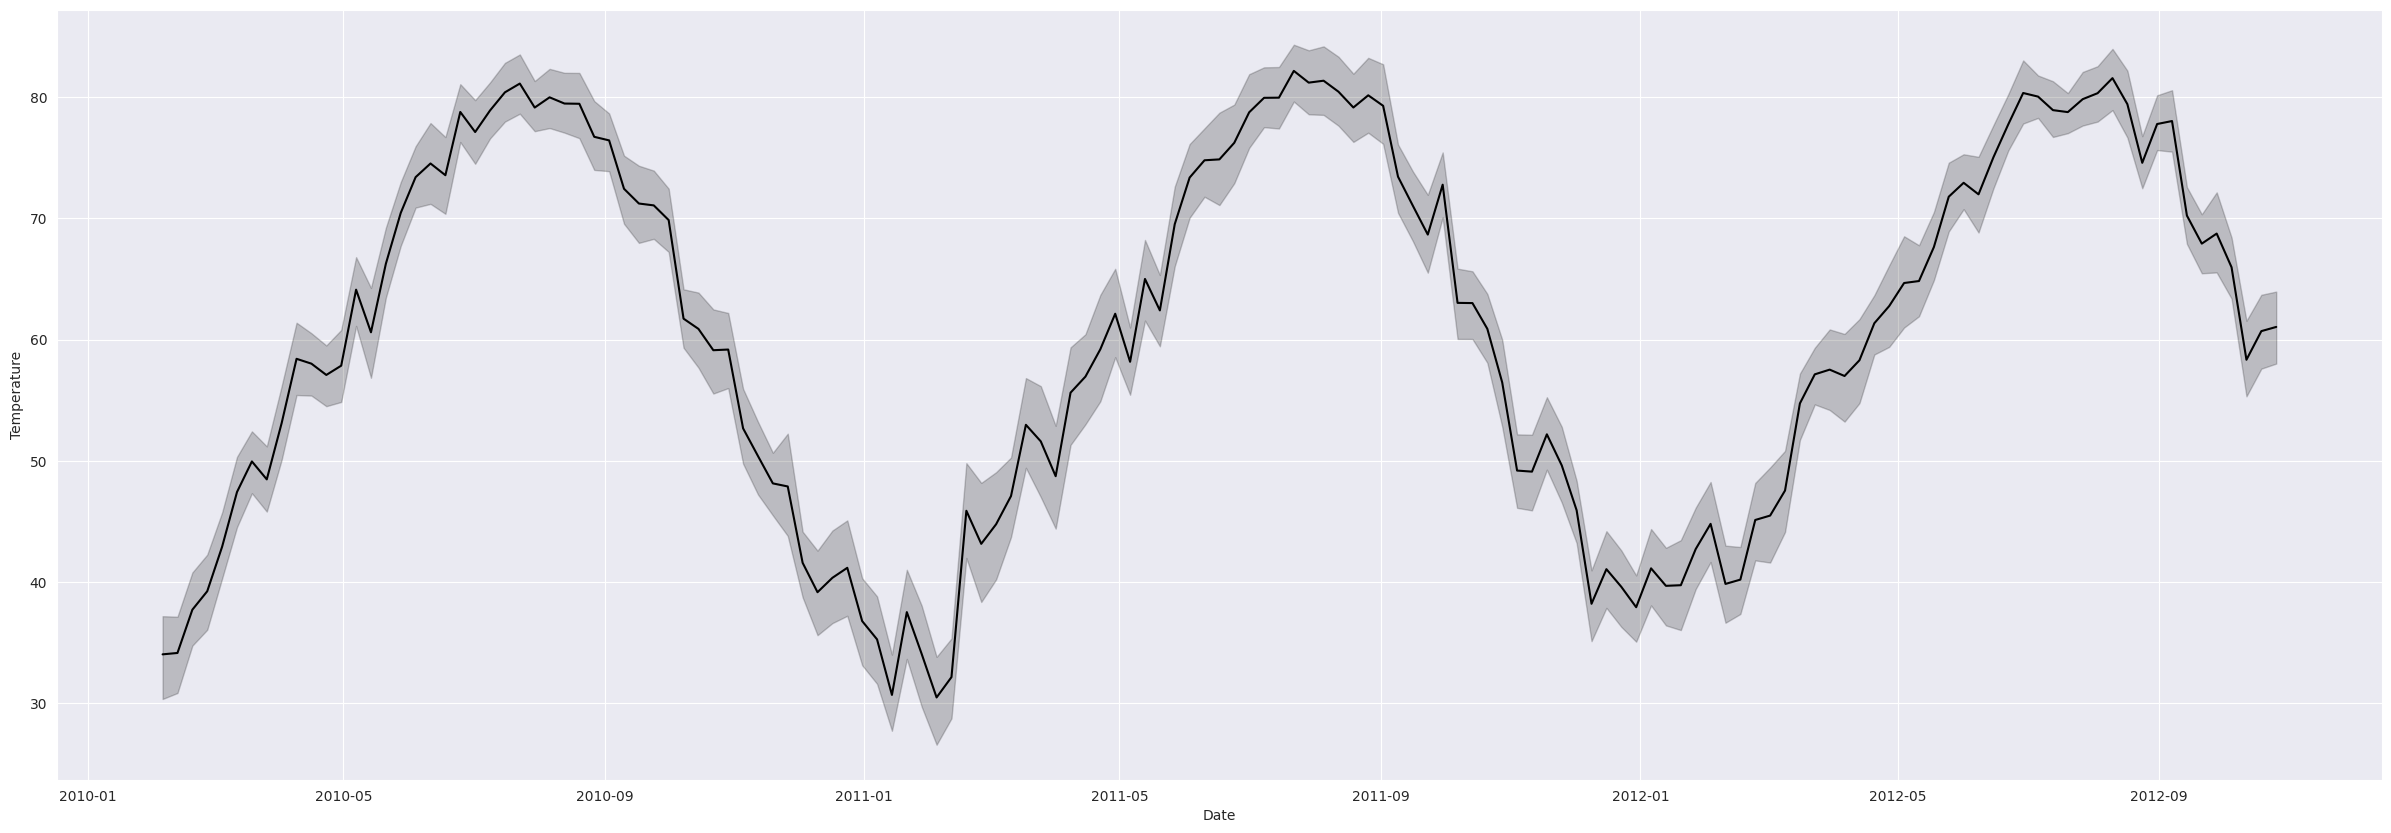

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(data=df, x='Date', y='Temperature', color='black')

Diante disso e já munidos dos coeficientes armazenados no dicionário anterior, tivemos um insight de que a melhor loja seria a que tivesse os três coeficientes negativos, mas mais próximos de 0 possível. A lógica do nosso insight é que as três variáveis são de um natureza prejudicial a cesta de consumo da população. Tanto preço de combustível, quanto desemprego e inflação diminuem o poder de compra do consumidor. Desta forma, a presença de uma loja com coeficiente positivo em qualquer uma dessas variáveis prejudica a verossimilhança dos indicadores da loja, já que a mera presença de uma correlação positiva não indica causa diante do contexto apontado.

In [ ]:
best_store = None
best_distance = float('inf')

for store, params in coefs.items():
    
    if params['Unemployment'] < 0 and params['Fuel_Price'] < 0:
        
        unemployment_distance = abs(params['Unemployment'])
        fuel_distance = abs(params['Fuel_Price'])
        
        if params['CPI_norm'] < 0:
            
            cpi_distance = abs(params['CPI_norm'])
            
            if unemployment_distance + fuel_distance + cpi_distance < best_distance:
                best_store = store
                best_distance = unemployment_distance + fuel_distance + cpi_distance
                
print("Best store:", best_store)
print("Unemployment distance:", (coefs[best_store]['Unemployment']))
print("Fuel price distance:", (coefs[best_store]['Fuel_Price']))
print("CPI distance:", coefs[best_store]['CPI_norm'])

Best store: None


KeyError: ignored

Como observamos acima, nenhuma loja obedece os requisitos que elencamos. Tal problema ocorre devido a um fenômeno estatístico chamado de Paradoxo de Simpson que distorce a correlação entre duas variáveis que deveria ser negativa, mas aparece erroneamente como positiva. Tal distorção provavelmente ocorre por algum dado não presente no dataset que confunde a regressão linear. Desta forma, por não haver uma confiança completa na correlação dos dados, decidimos por escolher a loja com a soma dos erros quadrados menor. Fazemos tal escolha devido ao fato de que a menor soma de erro quadrado denota a loja com os coeficientes menos distorcidos e cujo crescimento e dados são mais verificáveis que das outras loja e tem menor de chance de erro.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# create a list of stores
stores = df['Store'].unique()

# create an empty dictionary to store the RSS values for each store
rss_dict = {}

# loop through each store and fit a linear regression model
for store in stores:
    # filter the data for the current store
    store_data = df[df['Store'] == store]
    
    # split the data into features (X) and target (y)
    X = store_data[['Unemployment', 'Fuel_Price', 'CPI_norm']]
    y = store_data['Weekly_Sales']
    
    # fit a linear regression model and make predictions
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # calculate the RSS for the model
    rss = np.sum((y_pred - y)**2)
    
    # add the RSS to the dictionary for the current store
    rss_dict[store] = rss
    
# sort the RSS values in descending order and get the top 5
top_stores = sorted(rss_dict, key=rss_dict.get, reverse=False)[:5]

# print the top 5 stores and their RSS values
for store in top_stores:
    print(f"Store {store}: RSS = {rss_dict[store]}")

Store 44: RSS = 33079890505.925903
Store 30: RSS = 58012731082.679474
Store 37: RSS = 63571075184.62874
Store 33: RSS = 79227058536.10327
Store 36: RSS = 79243150325.31145


Como podemos ver acima a loja com a menor soma de erros quadrados é a loja 44. A seguir demonstramos um sumário do modelo em relação a essa loja para verificar se o modelo é realmente interpretável ou não.

In [ ]:
best_store_params = coefs[44]

best_store_model = sm.OLS(df[df['Store']==44]['Weekly_Sales'], 
                          df[df['Store']==44][['Fuel_Price', 'CPI_norm', 'Unemployment']])

best_store_results = best_store_model.fit()

print(best_store_results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.842e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):                   1.43e-181
Time:                        20:28:07   Log-Likelihood:                         -1580.5
No. Observations:                 143   AIC:                                      3167.
Df Residuals:                     140   BIC:                                      3176.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Julgando pelo R² acima nosso modelo é interpretável, então podemos dizer que os problemas estão nos dados e não no modelo. Restando a nós fixarmos nossa resposta para a pergunta na Loja 44. A seguir segue um gráfico representando a regressão linear da Loja 44.

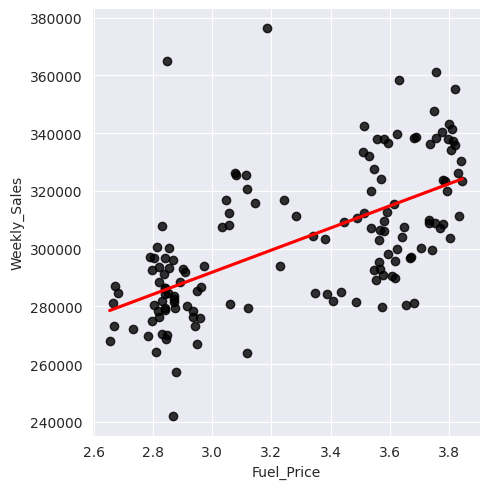

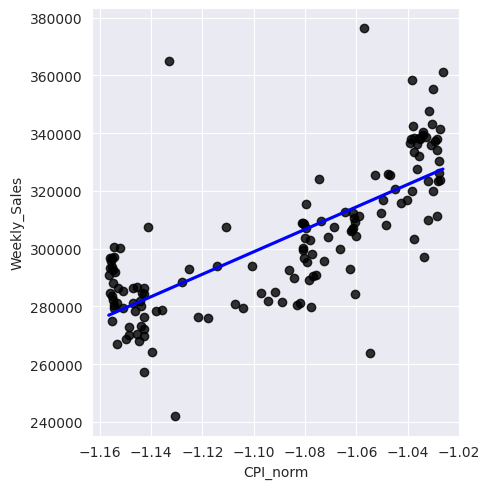

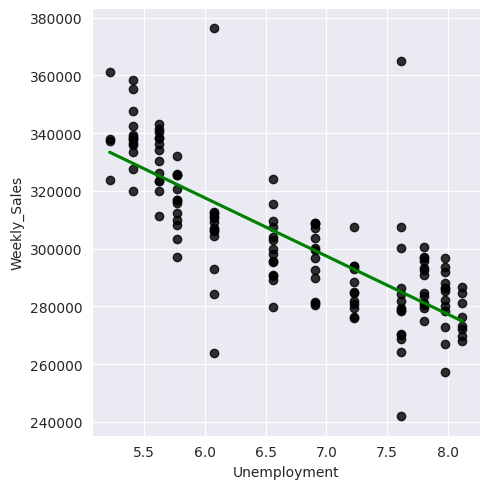

In [ ]:
# filter the data to only include store 44
df_44 = df[df['Store'] == 44]

# create the linear regression plot
sns.lmplot(x='Fuel_Price', y='Weekly_Sales', data=df_44, order=1, ci=None,
           scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
sns.lmplot(x='CPI_norm', y='Weekly_Sales', data=df_44, order=1, ci=None,
           scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})
sns.lmplot(x='Unemployment', y='Weekly_Sales', data=df_44, order=1, ci=None,
           scatter_kws={'color': 'black'}, line_kws={'color': 'green'})

Preferimos o uso de regressão por estar fora do escopo do exercício proposto o uso de séries temporais, que seriam mais adequadas ao dataset usado. Pretendemos em um futuro próximo refazer a análise usando mais ferramentas.